In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [59]:
file_path = 'all_car_listings.csv'

df = pd.read_csv(file_path)


Cleaning data

In [61]:
print(f'Old Price : {df['Fiyat'][0]}')
df['Fiyat'] = df['Fiyat'].str.replace(' TL', '').str.replace('.', '').astype(int)
print(f'New Price : {df['Fiyat'][0]}')

Old Price : 589.900 TL
New Price : 589900


In [62]:
print(f'Old : {df['KM'][0]}')
df['KM'] = (df['KM'] * 1000).astype(int)
print(f'New : {df['KM'][0]}')

Old : 61.0
New : 61000


In [63]:
print(f'Old : {df['Motor Hacmi'][0]}')
df['Motor Hacmi'] = df['Motor Hacmi'].str[:4]
print(f'New : {df['Motor Hacmi'][0]}')

Old : 1368 cc
New : 1368


Droping tables that contains only one value 

In [64]:
df = df.drop(columns = ['Marka', 'İlan No' , 'Araç Durumu' , 'Çekiş' , 'Plaka / Uyruk'] , inplace= False)

Lable encoding columns that has only 2 values

In [65]:
encoder = LabelEncoder()
# Apply label encoding to each column because each column has only 2 values
for col in ['Takas', 'Ağır Hasar Kayıtlı' , 'Garanti' , 'Vites']:
    df[col] = encoder.fit_transform(df[col])

One-hot encoding fuel type 

In [66]:
# Apply pd.get_dummies to create one-hot encoded columns for fuel type
df = pd.get_dummies(df, columns=['Yakıt'])
df[['Yakıt_Benzin' , 'Yakıt_Benzin & LPG' , 'Yakıt_Dizel' , 'Yakıt_Elektrik' , 'Yakıt_Hybrid']]

,Yakıt_Benzin,Yakıt_Benzin & LPG,Yakıt_Dizel,Yakıt_Elektrik,Yakıt_Hybrid
0,True,False,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,True,False,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
917,False,False,True,False,False
918,True,False,False,False,False
919,True,False,False,False,False
920,False,False,True,False,False


Product clutering paced on price
Note : this is what the assignment needed

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)  # We want 3 clusters: low, mid, high

prices = df[['Fiyat']]

df['Fiyat Category'] = kmeans.fit_predict(prices)

# Maping the cluster labels to categories
# 0 -> high, 1 -> mid, 2 -> low 
cluster_mapping = {0: 'high', 1: 'mid', 2: 'low'}

# Assign the category labels to a new column 'price_category'
df['cluster'] = df['Fiyat Category'].map(cluster_mapping)

print(df[['Fiyat' ,'Fiyat Category' , 'cluster']])

df = df.drop(columns=['cluster'])

      Fiyat  Fiyat Category cluster
0    589900               1     mid
1    919000               0    high
2    599000               1     mid
3    589900               1     mid
4    919000               0    high
..      ...             ...     ...
917  459000               1     mid
918  209000               2     low
919  729850               0    high
920  600000               1     mid
921  315000               2     low

[922 rows x 3 columns]


In [68]:
grouped = df.groupby('Fiyat Category')['Fiyat'].agg(['count', 'min', 'max', 'median', 'std'])

grouped

,count,min,max,median,std
Fiyat Category,,,,,
0,252,705000,1355000,785000.0,103433.125198
1,340,452500,700000,602375.0,72552.415132
2,330,135000,450000,316000.0,86185.991517


Creating a histogram presnting the clusters

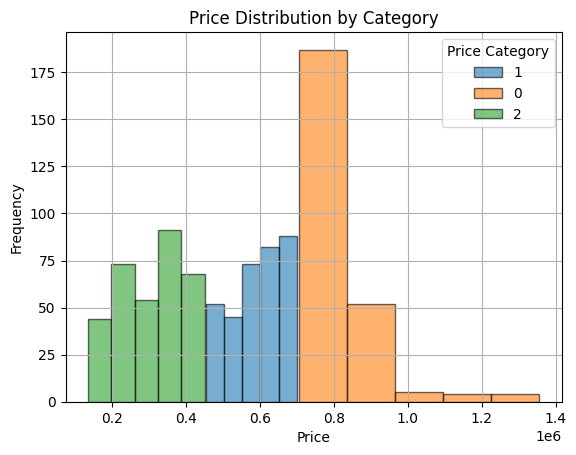

In [ ]:
# Loop through each price category and plot its histogram
for category in df['Fiyat Category'].unique():
    # Select data for the current category
    category_data = df[df['Fiyat Category'] == category]['Fiyat']
    
    # Plot the histogram for the current category
    plt.hist(category_data, bins=5, alpha=0.6, label=category, edgecolor='black')

# Step 2: Customize the plot
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Price Category')
plt.grid(True)

# Show the plot
plt.show()
